In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data_file = 'Type A Medicine - 3 Yrs (2015-17).xlsx'
df = pd.read_excel(data_file)
print(df)

           Year Month  Monthly Consumption of Type A Medicine
0          2015   Jan                                  1601.0
1          2015   Feb                                  1963.0
2          2015   Mar                                  2439.0
3          2015   Apr                                  2747.0
4          2015   May                                  3032.0
5          2015   Jun                                  3365.0
6          2015   Jul                                  2882.0
7          2015   Aug                                  2891.0
8          2015   Sep                                  2433.0
9          2015   Oct                                  2268.0
10         2015   Nov                                  2176.0
11         2015   Dec                                  1963.0
12         2016   Jan                                  1763.0
13         2016   Feb                                  2250.0
14         2016   Mar                                  2390.0
15      

In [61]:
year_data = np.array(df['Year'][:-2])
month_data = np.array(df['Month'][:-2])
amount_data = np.array(df['Monthly Consumption of Type A Medicine'][:-2])

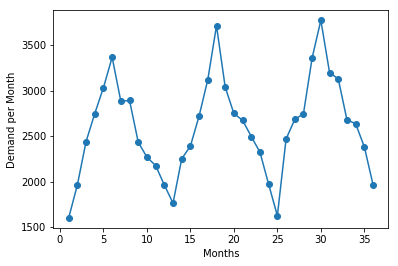

In [118]:
plt.plot(range(1,37) , amount_data , '-o')
plt.ylabel('Demand per Month')
plt.xlabel('Months')
plt.savefig('Data_given.png')

[2480.0, 2600.0, 2720.0]
[267110.1818181819, 281220.54545454547, 351510.1818181819]


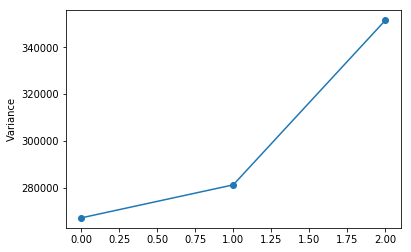

In [121]:
#implementing Normal Distribution
sample_mean = []
sample_variance = []
for j in range(3):
    sample_mean.append(np.mean(amount_data[j*12:(j+1)*12]))
    var = [np.square(i - sample_mean[j]) for i in amount_data[j*12:(j+1)*12]]
    sample_variance.append(np.sum(var)*1/11)
plt.figure()
plt.subplot(211)
plt.plot(range(0,3) , sample_variance , '-o')
plt.ylabel('Variance')
#plt.savefig('Variance_plot.png')
plt.subplot(212)
plt.plot(range(0,3) , sample_mean ,'-o')
plt.ylabel('mean_amount')
#plt.savefig('Mean_plot.png')
print(sample_mean)
print(sample_variance)

In [64]:
#implementing Two Layer Neural Networks
class NN_2_layers():
    def __init__(self , input_size , hidden_size , output_size):
        self.W1 = np.random.randn(input_size , hidden_size)
        #self.b1 = np.zeros((hidden_size , output_size))
        self.W2 = np.random.randn(hidden_size , output_size)
        #self.b2 = np.zeros(output_size)
    def cal_scores(self , X , y):
        hidden_scores = X.T.dot(self.W1) #+ self.b1
        final_scores = hidden_scores.dot(self.W2) #+ self.b2
        loss = np.square(final_scores - y)
        loss_ = final_scores - y
        return(final_scores , loss , loss_)
    def loss_grad(self , X , y = None , reg = 0.0):
        N = len(X)
        final_scores = []
        cost = 0.0
        loss = 0.0
        for j in range(N):
            loss += self.cal_scores(X[j] , y[j])[1]
            loss_ = self.cal_scores(X[j] , y[j])[2]
            final_scores.extend(self.cal_scores(X[j] , y[j])[0])
        cost = loss
        loss_ /= N
        return(cost , loss_ , final_scores)
    def train(self , X , y , learning_rate = 0.001):
        grad = self.loss_grad(X , y)[1]
        self.W1 -= grad * learning_rate
        self.W2 -= grad * learning_rate
        #self.b1 -= grad * learning_rate
        #self.b2 -= grad * learning_rate
    def test(self , X , y):
        return(self.loss_grad(X , y)[0] , self.loss_grad(X , y)[-1])

In [65]:
months = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12]
years = [2015 , 2016 , 2017]
X = []
for j in years:
    for i in months:
        X.append([[j], [i]])
X = np.array(X)
Y = np.array(amount_data)

Text(0,0.5,'Avg consumption per month')

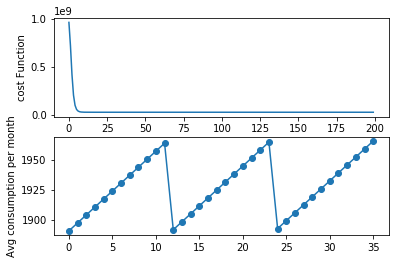

In [76]:
net = NN_2_layers(input_size = 2 , hidden_size = 10 , output_size = 1)
cost = []
for j in range(200):
    net.train(X , Y)
    cost.extend(net.test(X ,Y)[0])
plt.subplot(211)
plt.plot(range(len(cost)) , cost)
plt.ylabel('cost Function')
plt.subplot(212)
plt.plot(range(len(net.test(X , Y)[1])) , net.test(X , Y)[1] , '-o')
plt.ylabel('Avg consumption per month')

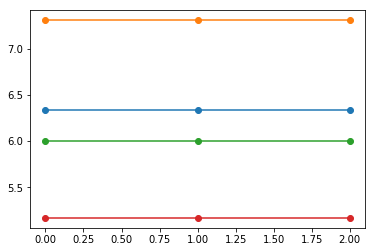

In [156]:
#implementing Triangular Distribution
trg_mean = []
trg_mode = []
trg_median = []
trg_variance = []
a = 1
b = 12
trg_variable = np.array(amount_data)
targets = []
for j in range(3):
    targets.append(trg_variable[j*12 : (j+1)*12][0])
    targets.append(np.max(trg_variable[j*12 : (j+1)*12]))
    targets.append(trg_variable[j*12 : (j+1)*12][-1])
    c = np.argmax(trg_variable[j*12 : (j+1)*12])
    #print(c)
    trg_mean.append((c + 1 + a + b)/3)
    trg_mode.append(c+1)
    if c > (a + b)/2 :
        trg_median.append(a + np.sqrt((b-a)*(c-a)/2))
    else :
        trg_median.append(b - np.sqrt((b-a)*(c-a)/2))
    trg_variance.append((a*a + b*b + c*c - a*b - c*a - b*c)/18)
#plt.subplot(411)
plt.plot(range(3) , trg_mean , '-o')
#plt.ylabel('mean')
#plt.subplot(412)
plt.plot(range(3) , trg_median , '-o')
#plt.ylabel('median')
#plt.subplot(413)
plt.plot(range(3) , trg_mode , '-o')
#plt.ylabel('mode')
#plt.subplot(414)
plt.plot(range(3) , trg_variance , '-o')
#plt.ylabel('variance')
plt.savefig('Triangular_distribution.png')

Text(0,0.5,'monthly consumption')

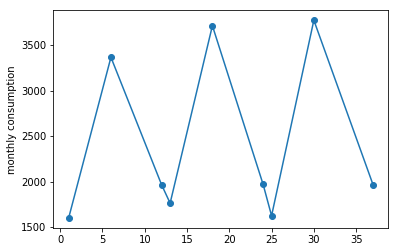

In [68]:
plt.plot([1 , 6 ,12 , 13 , 18 , 24 ,25 , 30 ,37] , targets , '-o')
plt.ylabel('monthly consumption')

In [69]:
import pandas  as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

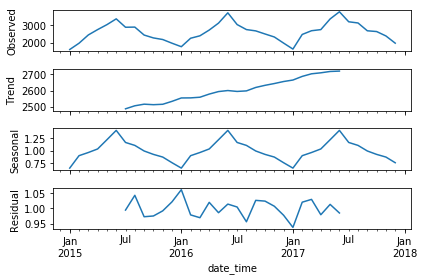

In [130]:
data_file = 'Type A Medicine - 3 Yrs (2015-17).xlsx'
df= pd.read_excel(data_file)
df = df[:-2]
dft = df[:-10]
dfte = df[-10:]

df["date_time"] = pd.Series(np.random.randn(36), index=df.index)
df["date_time"] = df["Year"].map(str) +"-"+ df["Month"] + "-01"
df.index = pd.to_datetime(df["date_time"])

price = df["Monthly Consumption of Type A Medicine"]

dft["date_time"] = pd.Series(np.random.randn(26), index=dft.index)
dft["date_time"] = dft["Year"].map(str) +"-"+ dft["Month"] + "-01"
dft.index = pd.to_datetime(dft["date_time"])

train = dft["Monthly Consumption of Type A Medicine"]

dfte["date_time"] = pd.Series(np.random.randn(10), index=dfte.index)
dfte["date_time"] = dfte["Year"].map(str) +"-"+ dfte["Month"] + "-01"
dfte.index = pd.to_datetime(dfte["date_time"])

test = dfte["Monthly Consumption of Type A Medicine"]

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(price, model='multiplicative')
result
result.plot()
plt.savefig('Time_series_decompositons.png')
plt.show()

In [71]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=181.650, BIC=182.780, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=182.735, BIC=184.430, Fit time=0.142 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=176.716, BIC=178.411, Fit time=0.090 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [72]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

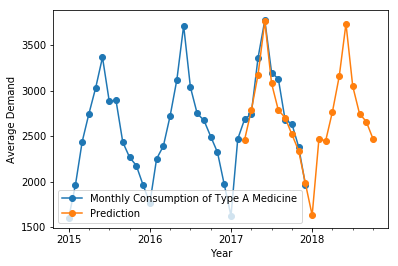

             Prediction
2017-03-01  2456.115415
2017-04-01  2781.019816
2017-05-01  3173.924216
2017-06-01  3759.828617
2017-07-01  3078.733018
2017-08-01  2783.637419
2017-09-01  2702.541820
2017-10-01  2518.446221
2017-11-01  2339.350622
2017-12-01  1980.255023
2018-01-01  1630.159424
2018-02-01  2467.063825
2018-03-01  2449.083640
2018-04-01  2767.892442
2018-05-01  3154.701244
2018-06-01  3734.510046
2018-07-01  3047.318847
2018-08-01  2746.127649
2018-09-01  2658.936451
2018-10-01  2468.745253


In [152]:
future_forecast = stepwise_model.predict(n_periods=20)
ls = ['2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01',
     '2017-12-01','2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01',
      '2018-09-01','2018-10-01'
     ]
future_forecast = pd.DataFrame(future_forecast,index =pd.to_datetime(ls),columns=['Prediction'])
pd.concat([price,future_forecast],axis=1).plot(style  = '-o')
plt.ylabel('Average Demand')
plt.xlabel('Year')
plt.savefig('future_forcast.png')
plt.show()
print(future_forecast)

[779, 798, 816]


Text(0.5,0,"Year's")

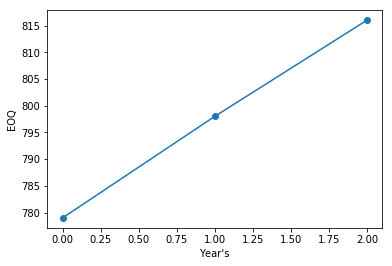

In [141]:
#calculating EOQ
EOQ = []
C = 200 + 4.2 # cost per Unit + Purchasing Cost = Total_order Cost
H = 20        # Holding cost # including inventory , expiry , refrigiration  10% of cost_per_unit_in_a_year 
for j in range(3):
    D = np.sum(amount_data[j*12 : (j + 1)*12])
    EOQ.append(int(np.sqrt(2*D*C/H)))
print(EOQ)
plt.plot(range(3) , EOQ , '-o')# 0,1,2 Indicates 2015,2016,2017
plt.ylabel('EOQ')
plt.xlabel('Year\'s')
#plt.savefig('EOQ_type_A_float.png')

[38, 39, 40]


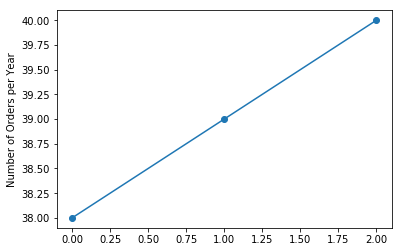

In [142]:
#Calculating Number of Orders per Level
Number_of_orders_per_year = []
for j in range(3):
    D = np.sum(amount_data[j*12 : (j + 1)*12])
    Number_of_orders_per_year.append(int(D/EOQ[j]))
print(Number_of_orders_per_year)
plt.plot(range(3) , Number_of_orders_per_year , '-o')
plt.ylabel('Number of Orders per Year')
plt.savefig('Number of orders per year.png')

/home/endou/anaconda3/envs/DA_OPEN_IIT/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


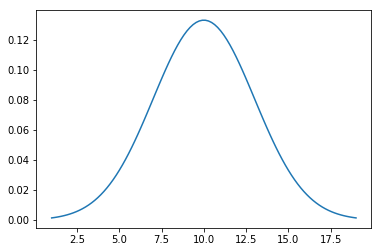

In [92]:
#Distribution of Lead Time and it's probability
import matplotlib.mlab as mlab
Lead_time_mean = 10
Lead_time_SD = 3
x = np.linspace(Lead_time_mean - 3 * Lead_time_SD , Lead_time_mean + 3 * Lead_time_SD , 100)
plt.plot(x , mlab.normpdf(x , Lead_time_mean , Lead_time_SD))

Re_order_level for year 2015 with respect to Lead_days :  [407.67123287671234, 489.20547945205476, 570.7397260273973, 652.2739726027397, 733.8082191780821, 815.3424657534247, 896.8767123287671, 978.4109589041095, 1059.945205479452, 1141.4794520547946, 1223.013698630137, 1304.5479452054794]
Re_order_level for year 2016 with respect to Lead_days :  [426.2295081967213, 511.47540983606564, 596.7213114754098, 681.9672131147541, 767.2131147540985, 852.4590163934427, 937.704918032787, 1022.9508196721313, 1108.1967213114756, 1193.4426229508197, 1278.688524590164, 1363.9344262295083]
Re_order_level for year 2017 with respect to Lead_days :  [447.1232876712329, 536.5479452054794, 625.9726027397261, 715.3972602739726, 804.8219178082192, 894.2465753424658, 983.6712328767123, 1073.0958904109589, 1162.5205479452054, 1251.9452054794522, 1341.3698630136987, 1430.7945205479452]


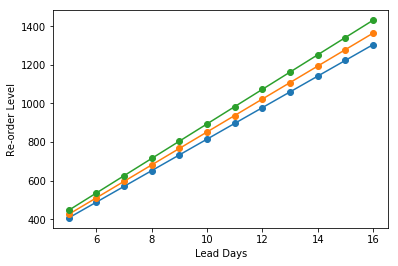

In [143]:
#calculating Re-order Level
Re_order_level = {}
for j in range(3):
    D = np.sum(amount_data[j*12 : (j + 1)*12])
    Re_order_level[str(j)] = []
    for L in range(5 , 17 , +1):
        if j == 1:
            K = D/366
        else : 
            K = D/365
        Re_order_level[str(j)].append(L*K)
    plt.plot(range(5 , 17) , Re_order_level[str(j)] , '-o')
    print( 'Re_order_level for year %d with respect to Lead_days : '  %(2015 + j), Re_order_level[str(j)])
plt.ylabel('Re-order Level')
plt.xlabel('Lead Days')
plt.savefig('Re-order Level vs Lead Days.png')

[1670.1424657534246, 1707.2590163934426, 1749.0465753424658]


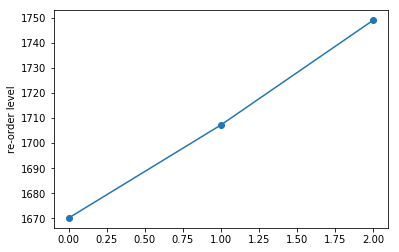

In [145]:
reorder_level = []
for j in range(3):
    D = np.sum(amount_data[j*12 : (j + 1)*12])
    if j==1:
        K = D/366
    else :
        K = D/365
    reorder_level.append(10*K + 854.8)
print(reorder_level)
plt.plot(range(3) , reorder_level , '-o')
plt.ylabel('re-order level')
plt.savefig('re-order level.png')

Total_holding_cost :  [7790.0, 7980.0, 8160.0]
Total_ordering_cost :  [6076992.0, 6371040.0, 6665088.0]


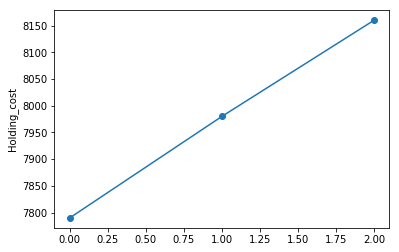

In [153]:
#calculating Total Ordering Cost and Total Holding Cost
Total_holding_cost = [j*0.5*20 for j in EOQ]
Total_ordering_cost = []
for j in range(3):
    D = np.sum(amount_data[j*12 : (j + 1)*12])
    Total_ordering_cost.append(D*C)
print( 'Total_holding_cost : ', Total_holding_cost)
print('Total_ordering_cost : ' , Total_ordering_cost)
#plt.subplot(211)
#plt.plot(range(3) , Total_ordering_cost , '-o')
#plt.ylabel('Ordering_cost')
#plt.savefig('ordering cost.png')
#plt.subplot(212)
plt.plot(range(3) , Total_holding_cost , '-o')
plt.ylabel('Holding_cost')
plt.savefig('Holding_cost.png')

Maximum_inventory_level for year 2015 with respect to Lead_days [2041.4712328767123, 1959.9369863013699, 1878.4027397260274, 1796.868493150685, 1715.3342465753426, 1633.8, 1552.2657534246575, 1470.731506849315, 1389.1972602739727, 1307.66301369863, 1226.1287671232876, 1144.5945205479452]
Maximum_inventory_level for year 2016 with respect to Lead_days [2079.0295081967215, 1993.783606557377, 1908.537704918033, 1823.2918032786883, 1738.0459016393443, 1652.8, 1567.5540983606556, 1482.3081967213113, 1397.062295081967, 1311.816393442623, 1226.5704918032786, 1141.3245901639343]
Maximum_inventory_level for year 2017 with respect to Lead_days [2117.923287671233, 2028.4986301369863, 1939.0739726027396, 1849.6493150684933, 1760.2246575342465, 1670.8, 1581.3753424657534, 1491.9506849315069, 1402.5260273972603, 1313.1013698630136, 1223.676712328767, 1134.2520547945205]


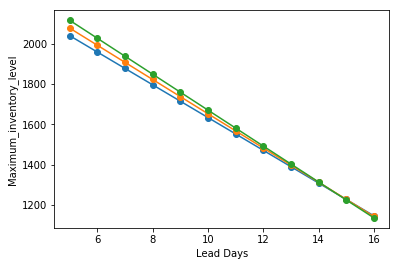

In [154]:
#calculating Maximum Iventory Level
Constant_safty_stock = 854.8
Maximum_inventory_level = {}
for j in range(3):
    Maximum_inventory_level[str(j)] = []
    D = np.sum(amount_data[j*12 : (j + 1)*12])
    if j==1:
        K = D/366
    else :
        K = D/365
    for i in range(5 , 17 , +1):
        Maximum_inventory_level[str(j)].append( 10*K + Constant_safty_stock - i*K + EOQ[j])
    plt.plot(range(5 , 17) , Maximum_inventory_level[str(j)] , '-o')
    print('Maximum_inventory_level for year %d with respect to Lead_days' %(2015 + j) , Maximum_inventory_level[str(j)])
plt.ylabel('Maximum_inventory_level')
plt.xlabel('Lead Days')
plt.savefig('Maximum_inventory_level.png')